# Lecute: Intro to Pandas Library 

In [1]:
import numpy as np
import pandas as pd

# Show me everything! 
# pd.options.display.max_rows = 999   
# pd.options.display.max_columns = 999 

## Pandas data structures

https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

https://www.w3resource.com/python-exercises/pandas/index.php

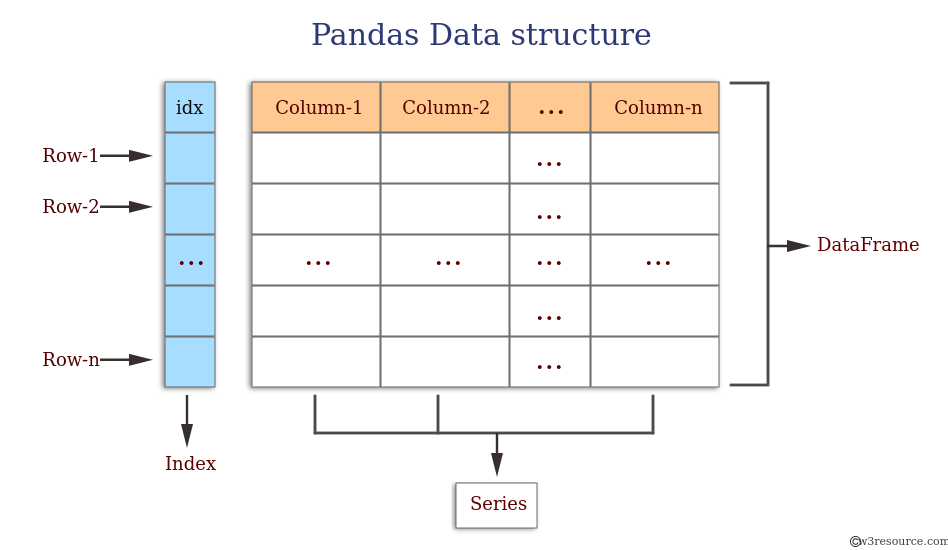

### Series

In [97]:
pd?

In [100]:
# from list
s = pd.Series([2, 4, 6, 10, 100], dtype=float)
print(type(s))
s

<class 'pandas.core.series.Series'>


0      2.0
1      4.0
2      6.0
3     10.0
4    100.0
dtype: float64

In [105]:
# from ndarrays
s = pd.Series(np.random.randn(5), index=['a', 1, 'c', 10., 'e'])
s

a      -0.52
1       0.18
c      -1.07
10.0   -0.63
e      -1.21
dtype: float64

In [106]:
# from dict
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [110]:
d = {'a': 0., 'b': 1., 'c': 2.}
d['a']
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [176]:
# series scalar
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [181]:
# Series as 1dim ndarray-like
print(s['a'])
print(s[0:3])

-0.014621654157307646
a   -0.01
1    2.13
c   -1.67
dtype: float64


In [123]:
# Series as typed dicts
print(s['a'])
# print(s['e'] = 12.)
print('e' in s)
s

-0.5220006755781451
True


a      -0.52
1       0.18
c      -1.07
10.0   -0.63
e      -1.21
dtype: float64

In [128]:
idx = s.keys().tolist()

idx_str = [el for el in idx if isinstance(el, str)]
s[idx_str]
# idx

a   -0.52
c   -1.07
e   -1.21
dtype: float64

### DataFrames

May be constracted from:

- Dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Structured or record ndarray

- A Series

- Another DataFrame

In [129]:
# From lists as rows
l1 = ['Hello', ',', 'my', 'friends']
l2 = ['What', 'a', 'lovely', 'day']
pd.DataFrame((l1, l2))

,0,1,2,3
0,Hello,",",my,friends
1,What,a,lovely,day


In [130]:
# From lists as columns
pd.DataFrame(list(zip(l1, l2)), columns = ['C1', 'C2'])

,C1,C2
0,Hello,What
1,",",a
2,my,lovely
3,friends,day


In [131]:
# From ndarray
pd.DataFrame([np.random.randn(5), np.random.randn(5)])

,0,1,2,3,4
0,-0.99,0.85,-2.13,-0.55,1.65
1,-1.30,-0.60,-0.90,0.73,0.16


In [133]:
# from dictionary of Series
d = {'one': pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 't']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
t,5.0,NaN


In [134]:
# from dictionary of lists
details = { 
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'], 
    'Age' : [23, 21, 22, 21], 
    'University' : ['BHU', 'JNU', 'DU', 'BHU'], 
} 

students = pd.DataFrame(details, index=['a', 'b', 'c', 'd'])  
students

,Name,Age,University
a,Ankit,23,BHU
b,Aishwarya,21,JNU
c,Shaurya,22,DU
d,Shivangi,21,BHU


## Data understanding 

Data from https://cneos.jpl.nasa.gov/fireballs/

Reding from csv files: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [195]:
df = pd.read_csv('cneos_fireball_data.csv')

In [138]:
# first 3 rows
df.head(3)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.11e+11,0.33
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.14e+11,0.34
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.00e+10,0.25


In [140]:
# last 10 rows
df.tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.60e+10,0.09
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.00e+10,0.13
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.50e+11,1.40
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.50e+12,5.20
846,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.58e+12,14.00


In [142]:
# Shapes and number of recodrs
df.shape

(847, 10)

In [143]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       847 non-null    object 
 1   Latitude (deg.)                      662 non-null    object 
 2   Longitude (deg.)                     662 non-null    object 
 3   Altitude (km)                        409 non-null    float64
 4   Velocity (km/s)                      233 non-null    float64
 5   vx                                   233 non-null    float64
 6   vy                                   233 non-null    float64
 7   vz                                   233 non-null    float64
 8   Total Radiated Energy (J)            847 non-null    float64
 9   Calculated Total Impact Energy (kt)  847 non-null    float64
dtypes: float64(7), object(3)
memory usage: 66.3+ KB


In [22]:
# statistics for each column
# count ??? 
df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,409.000000,233.000000,233.000000,233.000000,233.000000,8.470000e+02,847.000000
mean,36.034719,17.818455,-0.044206,-2.333906,-0.611159,9.274628e+11,1.447511
std,10.294843,5.897183,10.991042,10.995203,10.366448,1.369405e+13,16.397981
min,14.500000,9.800000,-35.400000,-43.500000,-31.200000,2.000000e+10,0.073000
25%,29.400000,13.800000,-8.500000,-10.700000,-8.500000,3.200000e+10,0.110000
50%,34.300000,16.700000,0.100000,-3.000000,0.600000,6.500000e+10,0.210000
75%,40.700000,19.800000,8.500000,4.600000,7.000000,1.500000e+11,0.430000
max,74.000000,49.000000,27.800000,31.200000,27.000000,3.750000e+14,440.000000


In [19]:
# count unique values in each columns 
df.nunique()

Peak Brightness Date/Time (UT)         847
Latitude (deg.)                        526
Longitude (deg.)                       604
Altitude (km)                          156
Velocity (km/s)                        127
vx                                     180
vy                                     183
vz                                     173
Total Radiated Energy (J)              293
Calculated Total Impact Energy (kt)    135
dtype: int64

In [150]:
print('Indeces: \n', df_ind.columns)
print('\nColumns:\n', df_ind.index)

Indeces: 
 Index(['Latitude (deg.)', 'Longitude (deg.)', 'Altitude (km)',
       'Velocity (km/s)', 'vx', 'vy', 'vz', 'Total Radiated Energy (J)',
       'Calculated Total Impact Energy (kt)'],
      dtype='object')

Columns:
 Index(['2020-11-07 21:27:04', '2020-10-26 15:09:10', '2020-10-23 20:51:39',
       '2020-10-22 17:39:33', '2020-10-21 18:57:33', '2020-10-21 06:38:49',
       '2020-10-19 07:05:47', '2020-10-18 10:52:43', '2020-09-18 08:05:27',
       '2020-08-30 16:08:22',
       ...
       '1994-08-15 23:16:48', '1994-06-15 00:02:26', '1994-06-03 20:48:42',
       '1994-05-29 09:30:58', '1994-02-01 22:38:09', '1993-11-29 17:48:41',
       '1993-10-31 03:39:27', '1991-10-04 09:22:47', '1990-10-01 03:51:47',
       '1988-04-15 03:03:10'],
      dtype='object', name='Peak Brightness Date/Time (UT)', length=847)


In [153]:
# getting list of values from a column
df['Longitude (deg.)'].values

array(['16.8E', '160.4E', '71.9W', '133.5W', '150.2W', '93.9W', '93.9E',
       '135.8W', '169.7W', '133.5E', '34.2W', '103.8W', '11.2W', '74.0E',
       '41.7E', '77.2E', '174.2E', '44.2W', '131.0W', '109.4W', '49.8W',
       '45.6W', '23.5E', '67.9W', nan, '90.8E', '15.1E', '96.0W', '76.7E',
       '1.5E', '35.8W', '34.3E', '66.0W', '116.4W', '125.2W', '17.5W',
       '147.6W', '161.7E', '37.7W', '52.2W', '31.7W', nan, '25.7E',
       '143.3W', '76.0W', '122.9E', '107.2W', '28.4W', '33.5W', '126.9E',
       '9.2E', '47.8W', '130.4W', '92.9W', '7.0E', '147.6W', '129.5W',
       '168.7E', '66.2W', '67.6W', '25.3W', '89.4E', '37.3W', '137.5E',
       '132.8E', '57.1W', '88.3W', '67.8E', '74.6W', '94.9E', '93.9W',
       '7.4W', '140.3E', '95.7E', '25.3E', '83.8W', nan, '6.5E', '174.4W',
       '172.4E', '6.7W', '172.9W', '57W', '83.5E', '148.6W', nan, '31.7W',
       '56.8E', '44.9E', '75.1E', '27.8W', '50.1W', '141.4E', '162.9W',
       '105.8E', '69.0W', '136.7W', '12.1E', '38.1E', '2

In [162]:
df.to_numpy()

array([['2020-11-07 21:27:04', '59.8N', '16.8E', ..., -12.7,
        111000000000.0, 0.33],
       ['2020-10-26 15:09:10', '5.9S', '160.4E', ..., -0.1,
        114000000000.0, 0.34],
       ['2020-10-23 20:51:39', '30.0N', '71.9W', ..., nan, 80000000000.0,
        0.25],
       ...,
       ['1991-10-04 09:22:47', '78.7N', '6.3E', ..., nan, 550000000000.0,
        1.4],
       ['1990-10-01 03:51:47', '7.5N', '142.8E', ..., nan,
        2500000000000.0, 5.2],
       ['1988-04-15 03:03:10', '4.1S', '124.3E', ..., nan,
        7580000000000.0, 14.0]], dtype=object)

## Data types 
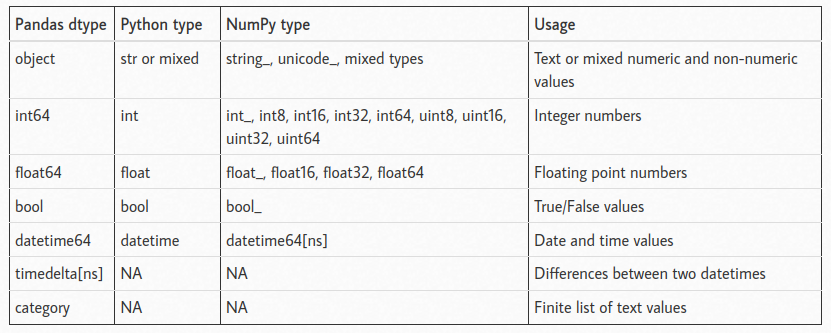
https://pbpython.com/pandas_dtypes.html

In [167]:
df['Peak Brightness Date/Time (UT)'].astype('datetime64') # .day_name() ## find methods

0     2020-11-07 21:27:04
1     2020-10-26 15:09:10
2     2020-10-23 20:51:39
3     2020-10-22 17:39:33
4     2020-10-21 18:57:33
              ...        
842   1993-11-29 17:48:41
843   1993-10-31 03:39:27
844   1991-10-04 09:22:47
845   1990-10-01 03:51:47
846   1988-04-15 03:03:10
Name: Peak Brightness Date/Time (UT), Length: 847, dtype: datetime64[ns]

## Data indexing and slicing
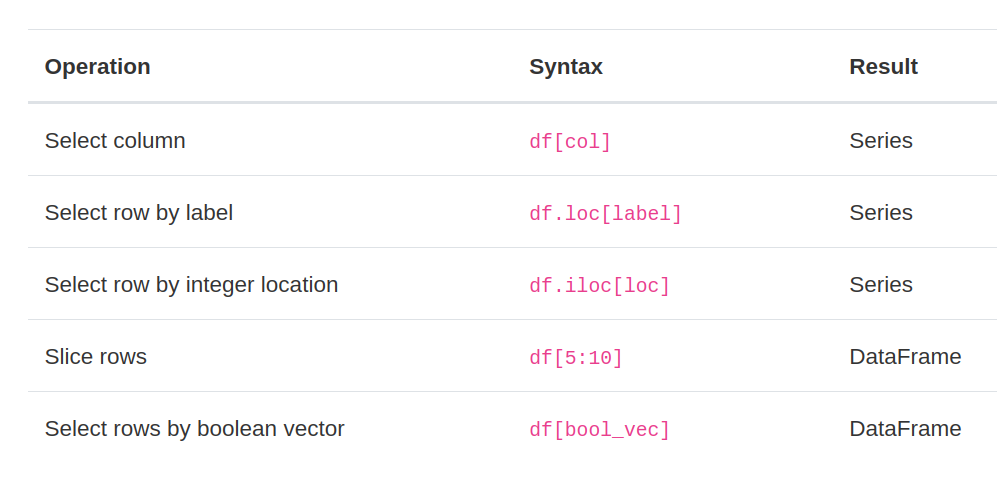
https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

In [172]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data[1:]

b    0.50
c    0.75
d    1.00
dtype: float64

In [260]:
# Immutable tupels # 
ls = (3, 4, 5, 6, 7, 8)
ls[0] = 10

TypeError: 'tuple' object does not support item assignment

In [261]:
# Index is immutable structure
data.index[0] = 'hello'

TypeError: Index does not support mutable operations

### Data frames

In [201]:
df_ind = pd.read_csv('cneos_fireball_data.csv', index_col='Peak Brightness Date/Time (UT)')
df_ind.head(4)

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Peak Brightness Date/Time (UT),,,,,,,,,
2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.11e+11,0.33
2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.14e+11,0.34
2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.00e+10,0.25
2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.40e+10,0.15


In [50]:
# getting column
df_ind['Latitude (deg.)']

Peak Brightness Date/Time (UT)
2020-11-07 21:27:04    59.8N
2020-10-26 15:09:10     5.9S
2020-10-23 20:51:39    30.0N
2020-10-22 17:39:33    22.0N
2020-10-21 18:57:33    12.9N
                       ...  
1993-11-29 17:48:41    26.5N
1993-10-31 03:39:27    51.3N
1991-10-04 09:22:47    78.7N
1990-10-01 03:51:47     7.5N
1988-04-15 03:03:10     4.1S
Name: Latitude (deg.), Length: 847, dtype: object

In [85]:
# getting columns from list of names
cols = ['vx','vy','vz']
df[cols]

,vx,vy,vz
0,-10.8,1.2,-12.7
1,10.9,-13.8,-0.1
2,NaN,NaN,NaN
3,-9.4,14.1,-4.9
4,NaN,NaN,NaN
...,...,...,...
842,NaN,NaN,NaN
843,NaN,NaN,NaN
844,NaN,NaN,NaN
845,NaN,NaN,NaN


In [202]:
# series
print(data.keys())
print(list(data.items()))

print(data['a'])
print(data['a':'c'])
print(data[0:3])

Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
0.25
a    0.25
b    0.50
c    0.75
dtype: float64
a    0.25
b    0.50
c    0.75
dtype: float64


In [66]:
# get records
df_ind[:3]

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Peak Brightness Date/Time (UT),,,,,,,,,
2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.33
2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.34
2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.25


In [86]:
# all together
df[cols][5:9]

,vx,vy,vz
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,15.6,1.5,4.9
8,10.2,2.9,-4.9


### Getting data with loc and iloc

sintaxis is similar to ndarrays slicing

In [223]:
# ????? why not unique? 
s1 = pd.Series(['a', 'v', 's', 'h', 'r'], index=[10, 1, 9, 10., 100])
s1.index
s1[10]

10.0    a
10.0    h
dtype: object

In [259]:
s1 = pd.Series(0, index=['a', 'v','v', 's', 'h', 'r'])
s1

a    0
v    0
v    0
s    0
h    0
r    0
dtype: int64

In [209]:
s = pd.Series(np.random.randn(5), index=['a', 1, 'c', 10., 'e'])
s

a      -1.40
1      -0.24
c       1.28
10.0   -1.28
e      -0.26
dtype: float64

In [211]:
s[0]

KeyError: 0

In [237]:
df1 = df.drop(index=0)
df1

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.14e+11,0.34
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.00e+10,0.25
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.40e+10,0.15
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,2.20e+10,0.08
5,2020-10-21 06:38:49,29.7S,93.9W,39.0,NaN,NaN,NaN,NaN,2.70e+10,0.10
...,...,...,...,...,...,...,...,...,...,...
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.60e+10,0.09
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.00e+10,0.13
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.50e+11,1.40
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.50e+12,5.20


In [255]:
# Loc - location, explicit index by name
df1.loc[10:100]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
10,2020-08-02 16:36:25,35.1S,34.2W,38.0,11.1,0.5,6.0,9.3,7.40e+10,0.23
11,2020-07-22 02:55:40,20.0S,103.8W,36.0,NaN,NaN,NaN,NaN,2.20e+10,0.08
12,2020-07-20 21:25:09,51.8S,11.2W,31.6,14.1,-2.9,-1.0,-13.8,5.00e+10,0.16
13,2020-07-12 07:50:32,48.7S,74.0E,29.4,18.3,-5.0,-13.0,-11.9,7.50e+10,0.23
14,2020-05-27 17:30:18,40.8N,41.7E,29.3,14.9,-6.0,-7.3,-11.5,5.70e+10,0.18
...,...,...,...,...,...,...,...,...,...,...
96,2018-07-17 15:17:37,82.5N,136.7W,NaN,NaN,NaN,NaN,NaN,2.11e+11,0.59
97,2018-06-26 17:51:53,32.0N,12.1E,63.0,14.1,-10.0,-1.0,-9.9,2.90e+10,0.10
98,2018-06-21 01:16:20,52.8N,38.1E,27.2,14.4,-8.9,-4.3,-10.5,1.22e+12,2.80
99,2018-06-02 16:44:12,21.2S,23.3E,28.7,16.9,0.9,-16.4,3.9,3.75e+11,0.98


In [76]:
df_ind.loc['2020-11-07 21:27:04']

Latitude (deg.)                                  59.8N
Longitude (deg.)                                 16.8E
Altitude (km)                                    22.30
Velocity (km/s)                                  16.70
vx                                              -10.80
vy                                                1.20
vz                                              -12.70
Total Radiated Energy (J)              111000000000.00
Calculated Total Impact Energy (kt)               0.33
Name: 2020-11-07 21:27:04, dtype: object

In [77]:
# iloc - integer location, implicit index by count
df.iloc[0]

Peak Brightness Date/Time (UT)         2020-11-07 21:27:04
Latitude (deg.)                                      59.8N
Longitude (deg.)                                     16.8E
Altitude (km)                                        22.30
Velocity (km/s)                                      16.70
vx                                                  -10.80
vy                                                    1.20
vz                                                  -12.70
Total Radiated Energy (J)                  111000000000.00
Calculated Total Impact Energy (kt)                   0.33
Name: 0, dtype: object

In [249]:
# Not the same!!! 
df1.iloc[10] is df1.loc[10]

False

In [250]:
df_ind.iloc['2020-11-07 21:27:04']

TypeError: Cannot index by location index with a non-integer key

In [251]:
# Must be the same
print(df.loc[0], '\n')
print(df.iloc[0])

Peak Brightness Date/Time (UT)         2020-11-07 21:27:04
Latitude (deg.)                                      59.8N
Longitude (deg.)                                     16.8E
Altitude (km)                                        22.30
Velocity (km/s)                                      16.70
vx                                                  -10.80
vy                                                    1.20
vz                                                  -12.70
Total Radiated Energy (J)                  111000000000.00
Calculated Total Impact Energy (kt)                   0.33
Name: 0, dtype: object 

Peak Brightness Date/Time (UT)         2020-11-07 21:27:04
Latitude (deg.)                                      59.8N
Longitude (deg.)                                     16.8E
Altitude (km)                                        22.30
Velocity (km/s)                                      16.70
vx                                                  -10.80
vy                             

In [81]:
# Must be the same
print(df1.loc['2020-10-26 15:09:10'], '\n')
print(df1.iloc[1])

Latitude (deg.)                                   5.9S
Longitude (deg.)                                160.4E
Altitude (km)                                    28.50
Velocity (km/s)                                  17.60
vx                                               10.90
vy                                              -13.80
vz                                               -0.10
Total Radiated Energy (J)              114000000000.00
Calculated Total Impact Energy (kt)               0.34
Name: 2020-10-26 15:09:10, dtype: object 

Latitude (deg.)                                   5.9S
Longitude (deg.)                                160.4E
Altitude (km)                                    28.50
Velocity (km/s)                                  17.60
vx                                               10.90
vy                                              -13.80
vz                                               -0.10
Total Radiated Energy (J)              114000000000.00
Calculated Total Impac

In [ ]:
# using loc
df.loc[:,'vx':'vz']

In [ ]:
# uising iloc
df.iloc[:,5:8]
# df

### Condiotion Mapping

In [256]:
df[df['Velocity (km/s)']<100]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.11e+11,0.33
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.14e+11,0.34
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.40e+10,0.15
7,2020-10-18 10:52:43,11.4S,135.8W,36.0,16.4,15.6,1.5,4.9,3.60e+10,0.12
8,2020-09-18 08:05:27,2.4N,169.7W,46.0,11.7,10.2,2.9,-4.9,4.10e+10,0.14
...,...,...,...,...,...,...,...,...,...,...
578,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.24e+11,1.50
579,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.33e+11,1.10
590,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.18e+11,1.30
595,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.15e+12,4.60


In [68]:
# set values
df.at[dates[0], "A"] = 0

NameError: name 'dates' is not defined

In [ ]:
df.iat[0, 1] = 0

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

In [67]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)